In [1]:
from geoscilabs.inversion.LinearInversionDirect import LinearInversionDirectApp
from ipywidgets import interact, FloatSlider, ToggleButtons, IntSlider, FloatText, IntText

In [2]:
app = LinearInversionDirectApp()

# Linear Inversion App

This app is based upon the inversion tutorial: "INVERSION FOR APPLIED GEOPHYSICS" by Oldenburg and Li (2005).

Douglas W. Oldenburg and Yaoguo Li (2005) 5. Inversion for Applied Geophysics: A Tutorial. Near-Surface Geophysics: pp. 89-150.
eISBN: 978-1-56080-171-9 
print ISBN: 978-1-56080-130-6 
https://doi.org/10.1190/1.9781560801719.ch5 


## Purpose

By using a simple decaying and oscillating kernel function, which emulates the physics of electromagnetic (EM) survey, we understand basic concepts of inverting data. Three items that we are going to explore are:

- Step1: Create a model ($\mathbf{m}$)
- Step2: Generate a sensitivity kernel (or matrix), $\mathbf{G}$
- Step3: Simulate data ($\mathbf{d} = \mathbf{G}\mathbf{m}$)
- Step4: All three steps together
- Step5: Invert the data, and explore inversion results

## Forward problem


Let $g_j(x)$ denote the kernel function for $j$th datum. With a given model $m(x)$, $j$th datum can be computed by solving following integral equation:

 $$ d_j = \int_a^{b} g_j(x) m(x) dx $$

where 

$$ g_j(x) = e^{p_jx} cos (2 \pi q_jx) $$ 

By discretizing $g_j(x)$ we obtain

$$ \mathbf{g}_j(\mathbf{x}) = e^{p_j\mathbf{x}} cos (2 \pi q_j \mathbf{x})$$

where

- $\mathbf{g}_j$: $j$th row vector for the sensitivty matrix ($1 \times M$)
- $\mathbf{x}$: model location ($1 \times M$)
- $p_j$: decaying constant (<0)
- $q_j$: oscillating constant (>0)

By stacking multiple rows of $\mathbf{g}_j$, we obtain sensitivity matrix, $\mathbf{G}$: 

\begin{align}
    \mathbf{G} = 
    \begin{bmatrix}
        \mathbf{g}_1\\
        \vdots\\
        \mathbf{g}_{N}
    \end{bmatrix}
\end{align}

Here, the size of the matrix $\mathbf{G}$ is $(N \times M)$. 
Finally data, $\mathbf{d}$, can be written as a linear equation:

$$ \mathbf{d} = \mathbf{G}\mathbf{m}$$

where $\mathbf{m}$ is an inversion model; this is a column vector ($M \times 1$). 

In real measurments, there will be various noises source, and hence observation, $\mathbf{d}^{obs}$, can be written as 

$$ \mathbf{d}^{obs} = \mathbf{G}\mathbf{m} + \mathbf{noise}$$

##  Step1: Create a model, $\mathbf{m}$

The model $m$ is a function defined on the interval (-2,2). Here we generate a model that is the sum of a: (a) background $m_{ref}$, (b) box car $m_1$ and (c) Gaussian $m_2$. The box car is defined by
- m$_{background}$ : amplitude of the background
- m1 : amplitude
- $m1_{center}$ : center
- $m1_{width}$ : width
the Gaussian is defined by 
- m2 : amplitude
- $m2_{center}$ : center
- $m2_{sigma}$ : width of Gaussian (as defined by a standard deviation)
- M: # of model parameters

In [3]:
Q_model = app.interact_plot_model()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m$_{background}$', max=2.0,…

##  Step2: Generate a sensitivity kernel (or matrix), $\mathbf{G}$

By using the following app, we explore each row vector of the sensitivity matrix, $\mathbf{g}_j$. Parameters of the apps are:

- M: # of model parameters
- N: # of data
- p: decaying constant (<0)
- q: oscillating constant (>0)
- ymin: maximum limit for y-axis
- ymax: minimum limit for y-axis

In [4]:
Q_kernel = app.interact_plot_G()

interactive(children=(IntSlider(value=20, continuous_update=False, description='N', min=1), IntSlider(value=10…

## Step3: Simulate data

The $j$-th datum is the inner product of the $j$-th kernel $g_j(x)$ and the model $m(x)$. In discrete form it can be written as the dot product of the vector $g_j$ and the model vector $m$.

### $$ d_j = \mathbf{g}_j \mathbf{m} $$

If there are $N$ data, these data can be written as a column vector, $\mathbf{d}$:

\begin{align}
    \mathbf{d} = \mathbf{G}\mathbf{m} = 
    \begin{bmatrix}
        d_1\\
        \vdots\\
        d_{N}
    \end{bmatrix}
\end{align}

### Adding Noise

Observational data are always contaminated with noise. Here we add Gaussian noise $N(0,\epsilon)$ (zero mean and standard deviation $\sigma$). Here we choose 

$$ \epsilon = \% |d| + \text{floor} $$
  

In [5]:
Q_data = app.interact_plot_data()

interactive(children=(Checkbox(value=False, description='add_noise'), FloatText(value=0.0, description='percen…

## Step4: All three steps together

In [6]:
app.interact_plot_all_three_together()

In [7]:
app.reset_to_defaults()

## Inverse Problem

In the inverse problem we attempt to find the model $\mathbf{m}$ that gave rise to the observational data $\mathbf{d}^{obs}$. The inverse problem is formulated as an optimization problem: 


$$\text{minimize} \ \ \ \phi(\mathbf{m}) = \phi_d(\mathbf{m}) + \beta \phi_m(\mathbf{m}) $$

where 

- $\phi_d$: data misfit
- $\phi_m$: model regularization
- $\beta$: trade-off (or Tikhonov) parameter  $0<\beta<\infty$

Data misfit is defined as 

$$ \phi_d = \sum_{j=1}^{N}\Big(\frac{\mathbf{g}_j\mathbf{m}-d^{obs}_j}{\epsilon_j}\Big)^2$$

where $\epsilon_j$  is an estimate of the standard deviation of the $j$th datum.





The model regularization term, $\phi_m$, can be written as 

$$ \phi_m(\mathbf{m}) = \alpha_s \int (\mathbf{m}-\mathbf{m}_{ref}) dx + \alpha_x \int (\frac{d \mathbf{m}}{dx}) dx$$

The first term is referred to as the "smallness" term. Minimizing this generates a model that is close to a reference model $m_{ref}$. The second term penalizes roughness of the model. It is generically referred to as a "flattest" or "smoothness" term.  

## Step5: Invert the data, and explore inversion results



In the inverse problem we define parameters needed to evaluate the data misfit and the model regularization terms. We then deal with parameters associated with the inversion.

### Parameters

- `mode`: `Run` or `Explore`
    - `Run`: Each click of the app, will run `n_beta` times of inversion
    - `Explore`: Not running inversions, but explore result of the inversions

#### Misfit
- `percent`: percentage of the uncertainty (%)

- `floor`: floor of the uncertainty (%)

- `chifact`: chi factor for stopping criteria (when $\phi_d^{\ast}=N \rightarrow$ `chifact=1`)

#### Model norm
- `mref`: reference model

- `alpha_s`: $\alpha_s$ for smallness

- `alpha_x`: $\alpha_x$ for smoothness

#### Beta
- `beta_min`: minimum $\beta$

- `beta_max`: maximum $\beta$

- `n_beta`: the number of $\beta$

#### Plotting options

- `data`: `obs & pred` or `normalized misfit`
    - `obs & pred`: show observed and predicted data
    - `normalized misfit`: show normalized misfit


- `tikhonov`: `phi_d & phi_m` or `phi_d vs phi_m`
    - `phi_d & phi_m`: show $\phi_d$ and $\phi_m$ as a function of $\beta$
    - `phi_d vs phi_m`: show tikhonov curve
    
- `i_beta`: i-th $\beta$ value

- `scale`: `linear` or `log`
    - `linear`: linear scale for plotting the third panel
    - `log`: log scale for plotting the third panel     

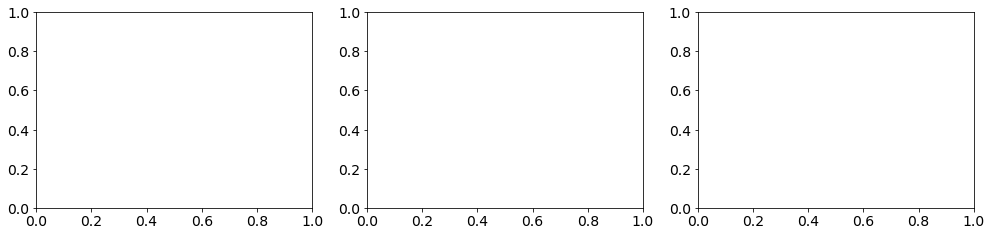

In [8]:
app.interact_plot_inversion()

In [ ]:
debug

> /Users/sgkang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py(377)_plot_args()
    375         # downstream.
    376         if any(v is None for v in tup):
--> 377             raise ValueError("x, y, and format string must not be None")
    378 
    379         kw = {}

ipdb> u
> /Users/sgkang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py(225)__call__()
    223                 this += args[0],
    224                 args = args[1:]
--> 225             yield from self._plot_args(this, kwargs)
    226 
    227     def get_next_color(self):

ipdb> u
> /Users/sgkang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py(1666)plot()
   1664         """
   1665         kwargs = cbook.normalize_kwargs(kwargs, mlines.Line2D._alias_map)
-> 1666         lines = [*self._get_lines(*args, data=data, **kwargs)]
   1667         for line in lines:
   1668             self.add_line(line)

ipdb> u
> /Users/sgkang/Projects/geosci-labs/geoscilabs/inversion/Linea

In [9]:
def foo(**kwargs):
    return kwargs

In [10]:
foo(a=1, b=1)

{'a': 1, 'b': 1}

In [11]:
app._props

OrderedDict([('m', <properties.math.Array at 0x10f57f4e0>),
             ('m_background', <properties.basic.Float at 0x10f57f550>),
             ('m1', <properties.basic.Float at 0x1102c2cc0>),
             ('m1_center', <properties.basic.Float at 0x1102c2cf8>),
             ('dm1', <properties.basic.Float at 0x125305dd8>),
             ('m2', <properties.basic.Float at 0x125137400>),
             ('m2_center', <properties.basic.Float at 0x12e688a20>),
             ('dm2', <properties.basic.Float at 0x12e688d30>),
             ('sigma_2', <properties.basic.Float at 0x12e688e10>),
             ('N', <properties.basic.Integer at 0x12e688e48>),
             ('M', <properties.basic.Integer at 0x12e688e80>),
             ('pmin', <properties.basic.Float at 0x12e688f28>),
             ('pmax', <properties.basic.Float at 0x12e69bdd8>),
             ('qmin', <properties.basic.Float at 0x12e6a00b8>),
             ('qmax', <properties.basic.Float at 0x12e6a0438>),
             ('scale', <propert

In [12]:
app._defaults

{}

In [13]:
for key in app._props:
    print (app._props[key])